In [ ]:
import numpy as np
import pandas as pd


### **Reindexing**
A critical method on pandas objects is reindex, which means to create a new object
with the data conformed to a new index.

In [ ]:
 obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
 obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing missing values if any index values were not already present

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling
of values when reindexing. The method option allows us to do this, using a method such
as ffill which forward fills the values:


In [3]:
import pandas as pd
# ffill

obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])    # 0 to 2 ->'blue'    2 to 4 ->'purple'   4 and greater than it
obj3.reindex(range(9), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
6    yellow
7    yellow
8    yellow
dtype: object

In [ ]:
# bfill

obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(9), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
6       NaN
7       NaN
8       NaN
dtype: object

In [ ]:
# bfill

obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 6])
obj3.reindex(range(9), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5    yellow
6    yellow
7       NaN
8       NaN
dtype: object

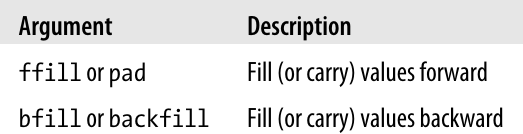

###Dropping entries from an axis

Dropping one or more entries from an axis is easy if you have an index array or list
without those entries.


The drop
method will return a new object with the indicated value or values deleted from an axis

In [9]:
import numpy as np

obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

new_obj = obj.drop('c')

new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
 obj.drop(['d', 'c'])


a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
obj   # No changes to be observed as the new obj is being asssign the return output form the dropping of column in dataframe.

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

###More...Selection and Filtering

In [5]:
import pandas as pd
import numpy as np

data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Now Try to Comprehend what all these code cells are trying to do!

In [6]:
data['two']['Ohio']    #returns column 'two'of the dataframe, with index

1

In [ ]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [ ]:
 data[:2]     # Slicing of dataframe

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
 data[data['three'] > 5]    # returns part of data, where the column value of data's 'three' column > 5

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data < 5   # Tells if dataframe values are < 5 or not in tabular form for each value in it

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [12]:
 df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [13]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [14]:
df1 + df2   #Adding these together results in NA values in the locations that don’t overlap

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [15]:
df1.add(df2, fill_value=0)   #Using the add method on df1, I pass df2 and an argument to fill_value

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Using the add method on df1, passing df2 and an argument to fill_value.

You could also pass, a series into the Pandas method as an arguement and compute the output.

Example:

`pd.Series.add(df1,df2)`

few such operations are:-

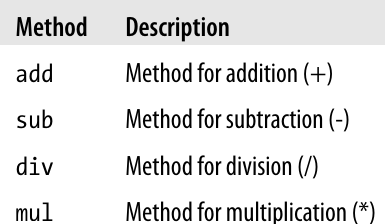

In [20]:
pd.DataFrame.add(df1,df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


####Function application and mapping

Another frequent operation is applying a function on 1D arrays to each column or row.
DataFrame’s apply method

In [9]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])  # randn In NumPy, np.random.randn() is used to generate an array of random numbers sampled from a standard normal distribution (mean=0, standard deviation=1).
frame

,b,d,e
Utah,0.079756,-0.167588,0.005581
Ohio,0.873966,2.557971,-0.582164
Texas,0.383305,1.017064,0.306397
Oregon,-1.256152,0.145467,-1.062265


In [10]:
f = lambda x: x**2

In [11]:
frame.apply(f)

,b,d,e
Utah,0.006361,0.028086,0.000031
Ohio,0.763816,6.543213,0.338915
Texas,0.146922,1.034420,0.093879
Oregon,1.577918,0.021161,1.128406


The function passed to apply need not return a scalar value, it can also return a Series
with multiple values:


In [39]:
def f(x):
  return pd.Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,b,d,e
min,0.160324,-0.498869,-1.007697
max,2.265205,0.267422,1.305580


map

In [53]:
add_in = lambda x:  x/2

y = frame.apply(add_in, axis =1)

print(y)

               b         d         e
Utah    1.132603  0.133711 -0.503848
Ohio    0.357926  0.123562  0.652790
Texas   0.080162 -0.249435 -0.394050
Oregon  0.342814 -0.077014 -0.425153


In [45]:
format = lambda x:  x**2

x = frame.map(format)
y = frame.apply(format, axis =0)

print(x)
print(y)

               b         d         e
Utah    5.131155  0.071515  1.015453
Ohio    0.512443  0.061071  1.704539
Texas   0.025704  0.248870  0.621101
Oregon  0.470085  0.023724  0.723019
               b         d         e
Utah    5.131155  0.071515  1.015453
Ohio    0.512443  0.061071  1.704539
Texas   0.025704  0.248870  0.621101
Oregon  0.470085  0.023724  0.723019


In [33]:
format = lambda x:  x%2

frame.apply(format, axis = 0)

,b,d,e
Utah,1.137946,0.926642,1.233864
Ohio,0.401545,1.648087,0.604375
Texas,0.862697,1.765532,0.853673
Oregon,0.263955,1.397139,0.741112


map

In [34]:
frame['e'].map(format)

frame

,b,d,e
Utah,1.137946,-1.073358,-0.766136
Ohio,-1.598455,-2.351913,-1.395625
Texas,-1.137303,-0.234468,0.853673
Oregon,-1.736045,-0.602861,-1.258888


here is a concise comparison between apply and applymap in pandas:

**apply**

* Scope: Applies a function along rows or columns.

* Usage: Works with DataFrame and Series.
Function Application: Applies to entire rows/columns.


####pandas Sorting and Ranking

Sorting by Index

In [54]:
#Series Example:

obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
sorted_obj = obj.sort_index()
print(sorted_obj)

a    1
b    2
c    3
d    0
dtype: int64


In [55]:
#DataFrame Example:

frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c'])

# Sort by row index
sorted_frame = frame.sort_index()
print(sorted_frame)

# Sort by column index
sorted_frame_col = frame.sort_index(axis=1)
print(sorted_frame_col)

       d  a  b  c
one    4  5  6  7
three  0  1  2  3
       a  b  c  d
three  1  2  3  0
one    5  6  7  4


**Descending or Acsending Order:**

Use True / False to make it happen.

In [56]:
sorted_frame_desc = frame.sort_index(axis=1, ascending=False)
print(sorted_frame_desc)

       d  c  b  a
three  0  3  2  1
one    4  7  6  5


**Sorting by Values**


In [57]:
# Series Example:


obj = pd.Series([4, 7, -3, 2])
sorted_obj = obj.sort_values()
print(sorted_obj)

2   -3
3    2
0    4
1    7
dtype: int64


In [58]:
# DataFrame Example (by column):

frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
sorted_frame_by_b = frame.sort_values(by='b')
print(sorted_frame_by_b)

   b  a
2 -3  0
3  2  1
0  4  0
1  7  1


NOTE: In pandas, when sorting by values, NaN (Not a Number) values are treated as if they are larger than any other values by default. Therefore, they are placed at the end of the sorted Series or DataFrame by default.

**Sorting by Multiple Columns:**

In [67]:
sorted_frame_by_ab = frame.sort_values(by=['a', 'b'])
print(sorted_frame_by_ab.reindex(columns = ['a','b']))

   a  b
2  0 -3
0  0  4
3  1  2
1  1  7


####**Ranking**


Mostly used syntax: `Series/DataFrame_Col.rank(method='______')`


method: {‘average’, ‘min’, ‘max’, ‘first’, ‘dense’}, default ‘average’
Method used to assign ranks to tied elements:
* ‘`average`': Assigns the average rank to each group of tied values.
* ‘`min`’: Assigns the minimum rank to each group of tied values.
* ‘`max`’: Assigns the maximum rank to each group of tied values.
* ‘`first`’: Assigns ranks in the order the values appear in the array.
* ‘`dense`’: Assigns ranks in a dense fashion; the rank increases by 1 between groups of tied values.


In [ ]:
# Series Example:

obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
ranked_obj = obj.rank()
print(ranked_obj)

In [ ]:
ranked_obj_first = obj.rank(method='first')
print(ranked_obj_first)

In [ ]:

ranked_obj_desc = obj.rank( method='max')
print(ranked_obj_desc)


In [ ]:
# DataFrame Example:


frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})
ranked_frame = frame.rank(axis=1)
print(ranked_frame)

###`loc` (Label-based Indexing)

loc is used for accessing a group of rows and columns by labels or a boolean array. It is label-based, meaning that you have to specify rows and columns based on their labels.

Syntax:
`df.loc[row_labels, column_labels]`




In [ ]:
# Example 1

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['a', 'b', 'c'])
result = df.loc['a', 'A']


In [ ]:
result = df.loc[:, 'A']  #Selecting All Rows for Specific Column


In [ ]:
result = df.loc['a', :]  #Selecting Specific Rows and All Columns

In [ ]:
result = df.loc[['a', 'b'], ['A', 'B']]   #Selecting Multiple Rows and Columns

**Conditional Selection**

`df.loc[df['column_label'] > value]`



In [ ]:
result = df.loc[df['A'] > 1]

### **`iloc` (Integer-location Based Indexing)**

iloc is used for accessing a group of rows and columns by integer positions (i.e., positions based on the index order).

Syntax: `df.iloc[row_positions, column_positions]`



In [ ]:
#Example 1

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
result = df.iloc[0, 0]


In [ ]:
result = df.iloc[:, 0]  #Selecting All Rows for Specific Column


In [ ]:
result = df.iloc[0, :]  #Selecting Specific Rows and All Columns

In [ ]:
result = df.iloc[[0,1], [0,1]]   #Selecting Multiple Rows and Columns

####Slicing Rows and Columns:


Syntax:  `df.iloc[row_start:row_end, col_start:col_end]`

In [ ]:
result = df.iloc[0:2, 0:2]

**Differences between loc and iloc**

Type of Indexing:
* loc: Label-based indexing
* iloc: Integer-based indexing

Out-of-Bounds Indexing:
* loc: Will raise a KeyError if a label is not found.
* iloc: Will raise an IndexError if the index is out of bounds.

Usage with Slicing:
* loc: The end of the slice is included.
* iloc: The end of the slice is excluded.


 These methods provide flexible and powerful ways to select and filter data based on labels or integer positions resulting refined data.

###**Pandas concat, join, and merge Operations**

####**concat (Concatenation)**
The concat function is used to concatenate pandas objects along a particular axis with optional set logic along the other axes.

Syntax:`pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,  sort=False)`

Parameters
* objs: A sequence or mapping of Series or DataFrame objects.
* axis: The axis to concatenate along (default is 0, meaning rows).
* join: How to handle indexes on other axis (outer, inner).
* ignore_index: If True, do not use the index values along the concatenation axis (default is False).
* keys: Construct hierarchical index using the passed keys as the outermost level.
* sort: Sort non-concatenation axis if it is not already aligned.

In [ ]:
# Concatenating DataFrames Vertically (default)

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']})
df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'], 'B': ['B3', 'B4', 'B5']})

result = pd.concat([df1, df2])

result

In [ ]:
# Concatenating DataFrames Horizontally:

result = pd.concat([df1, df2], axis=1)
result

In [ ]:
# Using keys Parameter:

result = pd.concat([df1, df2], keys=['df1', 'df2'])
result

####**join (Joining)**
The join function is used to join DataFrames on indices or on a key column.

Syntax:`df.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)`

Parameters
* other: DataFrame, Series, or list of DataFrame.
* on: Column or index level name(s). If None, join indexes.
* how: One of left, right, outer, inner (default is left).
* lsuffix: Suffix to use for overlapping column names in the left DataFrame.
* rsuffix: Suffix to use for overlapping column names in the right DataFrame.
* sort: Sort the join keys.

In [ ]:
# Joining on Index:

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2']}, index=['K0', 'K1', 'K2'])
df2 = pd.DataFrame({'B': ['B0', 'B1', 'B2']}, index=['K0', 'K2', 'K3'])
result = df1.join(df2, how='outer')

result

In [ ]:
# Joining on Key Columns:

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'key': ['K0', 'K1', 'K2']})
df2 = pd.DataFrame({'B': ['B0', 'B1', 'B2'], 'key': ['K0', 'K2', 'K3']})
result = df1.join(df2.set_index('key'), on='key', how='outer')

result

####**merge (Merging)**
The merge function is similar to SQL joins and combines DataFrames based on key columns.

Syntax: `pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False)`

Parameters
* left: A DataFrame.
* right: Another DataFrame.
* how: Type of merge (left, right, outer, inner).
* on: Column or index level names to join on. Must be found in both DataFrames.
* left_on: Column or index level names to join on in the left DataFrame.
* right_on: Column or index level names to join on in the right DataFrame.
* left_index: Use index from the left DataFrame as the join key(s).
* right_index: Use index from the right DataFrame as the join key(s).



In [ ]:
# Inner Join:


df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K3'], 'B': ['B0', 'B1', 'B2']})
result = pd.merge(df1, df2, on='key')
result

In [ ]:
# Left Join:

result = pd.merge(df1, df2, on='key', how='left')

result


In [ ]:
# Right Join:

result = pd.merge(df1, df2, on='key', how='right')

result

In [ ]:
# Outer Join:

result = pd.merge(df1, df2, on='key', how='outer')

result

`concat`: Use for concatenating DataFrames along rows or columns, stacking them on top of each other or side by side.

`join`: Use for joining DataFrames on indices or on key columns. It is convenient for index-based joins.

`merge`: Use for database-style joins, combining DataFrames based on one or more keys, similar to SQL joins. This method is very flexible and can handle different join types and column/key names.

### **dropna() Method**

The `dropna()` method in pandas is used to remove missing values (NaNs) from a DataFrame or Series. It is a powerful tool for data cleaning, allowing you to manage and preprocess your data by eliminating rows or columns with missing data.

Syntax:
`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

`Series.dropna(axis=0, inplace=False)`


#####*Parameters*

**Common Parameters (for both DataFrame and Series)**

* axis: {0 or ‘index’, 1 or ‘columns’}, default 0

 * Determine if rows or columns which contain missing values are removed.
 * 0, or ‘index’: Drop rows which contain missing values.
 * 1, or ‘columns’: Drop columns which contain missing values.
* inplace: bool, default False

 * If True, do operation inplace and return None.


**DataFrame-specific Parameters**
* how: {‘any’, ‘all’}, default ‘any’

 * Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
 * ‘any’: If any NA values are present, drop that row or column.
 * ‘all’: If all values are NA, drop that row or column.

* thresh: int, optional

 * Keeps rows/columns with at least n non-NA values. Cannot be combined with how.

* subset: array-like, optional

 * Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.

In [ ]:
# Dropping Rows with Any Missing Values
# Example:

df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, np.nan, np.nan, 4]
})
result = df.dropna()

result

In [ ]:
# Dropping Columns with Any Missing Values


result = df.dropna(axis=1)

In [ ]:
# Dropping Rows with All Missing Values

df = pd.DataFrame({
    'A': [np.nan, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [np.nan, np.nan, np.nan, 4]
})

result = df.dropna(how='all')

In [ ]:
# Dropping Columns with All Missing Values

result = df.dropna(axis=1, how='all')

In [ ]:
# Using subset Parameter to Specify Columns for NA Consideration

df = pd.DataFrame({
    'A': [1, np.nan, 3, 4],
    'B': [np.nan, 2, 3, np.nan],
    'C': [1, 2, np.nan, 4]
})

result = df.dropna(subset=['A', 'B'])

result

In [ ]:
# Inplace Parameter
# If inplace=True, the operation is performed in place and the DataFrame is modified directly.


df.dropna(inplace=True)

### **`fillna` Method in Pandas:**

The `fillna` method in pandas is used to fill missing values in a DataFrame or Series with a specified value or using a method to propagate values. This method is essential for data cleaning and preprocessing, especially when dealing with datasets that have missing or null values.

Syntax: `DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)`


**Parameters**

* **value: scalar, dict, Series, or DataFrame**

 Value to use to fill the missing values. This can be a single value (e.g., a scalar), a dictionary of values specifying the value to use for each column, or a Series/DataFrame with matching indices.


* **method: {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’}, optional**

 Method to use for filling holes in reindexed Series. pad/ffill: propagate last valid observation forward to next valid. backfill/bfill: use next valid
 observation to fill the gap.

* **axis: {0 or ‘index’, 1 or ‘columns’}, default 0**

 Axis along which to fill missing values. For DataFrame: axis=0 fills along the index (rows), axis=1 fills along the columns.

* **inplace: bool, default False**

 If True, fill in-place. Note: this will modify the original DataFrame/Series.

* **limit: int, default None**

 Maximum number of consecutive NaNs to fill. If limit is specified, only this many consecutive NaNs will be filled.


In [ ]:
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, np.nan, np.nan, 4]
})


# Fill missing values with a scalar value (e.g., 0)

df_filled = df.fillna(0)  # or df_filled = df.fillna(value=0)


In [ ]:
# Fill missing values with the mean of each column
df_filled_mean = df.fillna(df.mean())


# Fill missing values with the median of each column
df_filled_median = df.fillna(df.median())


In [ ]:
# Fill missing values with a dictionary specifying fill values for each column

df_filled_dict = df.fillna({'A': 0, 'B': 1, 'C': 2})

You can print and check the DataFrames created by filling up the nan values.
